In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
import os.path
from os import path
import pickle
import math
#import graphviz
import IPython
import sys
import platform

In [3]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [4]:
########################
###### Functions ######
#######################

############# η ##################
def fη(γ, β0, F, αS, αI, Z):
    return (1 - γ) * (1 + (β0 * F) - αI - (Z * (1 - αI) / (1 - αS)))

############ υ ##################
def fυ(T, t, ηmin, ηmax, Fmin, ρ):
    return ((1 - Fmin) / (ρ * (ηmax - ηmin))) / ((ηmax ** (T - t) - 1)/(ηmax - 1))

############# Dynamics #########
def fdynamics(υ, U, F, J, U0, γ, β0, Fmin,  ρ, αS, αI, Z, Tdelay):
    T = U.shape[0]
    print("υ, U and F:")
    for zidx in range(Z.shape[0]):
        ηmin = fη(γ, β0, Fmin, αS, αI, Z[zidx])
        ηmax = fη(γ, β0, 1, αS, αI, Z[zidx])
        for t in range(T):
            υ[t, zidx] = fυ(T, t, ηmin, ηmax, Fmin, ρ)
        for tidx in range(Tdelay.shape[0]):
            U[0, tidx, zidx] = U0
            for t in range(T-1):
                if (U[t, tidx, zidx] >= υ[t, zidx]) and t >= Tdelay[tidx]:
                    F[t, tidx, zidx] = Fmin
                    U[t+1, tidx, zidx] = ηmin * U[t, tidx, zidx]
                else:
                    F[t, tidx, zidx] = 1.0
                    U[t+1, tidx, zidx] = ηmax * U[t, tidx, zidx]
            F[T-1, tidx, zidx] = F[T-2, tidx, zidx]
    for zidx in range(Z.shape[0]):
        for tidx in range(Tdelay.shape[0]):
            J[T-1, tidx, zidx] = ρ * U[T-1, tidx, zidx]
            for t in range(T-2,-1, -1):
                J[t, tidx, zidx] = (1 - F[t, tidx, zidx]) + ρ * U[t, tidx, zidx] + J[t+1, tidx, zidx]       

In [4]:
#matplotlib.use("pdf")
#matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [5]:
# def plot_fig1():
#     fig, ax11 = plt.subplots(1, 1)
#     for zidx in [0, 2]:
#         υaux = np.ones((T))
#         υaux = np.minimum(υ[:, zidx], υaux)
#         ax11.plot(υaux, label='$Z$ = ' + str(Z[zidx]), linewidth=3)
#     ax11.set_yscale("log")
#     ax11.set_xlabel(r'$t$')
#     ax11.set_ylabel(r'$\upsilon^t$')
#     ax11.grid()
#     #ax11.legend()
#     #plt.show()
#     plt.rc('font', size=30)
#     plt.rc('axes', labelsize=40) 
#     plt.savefig("fig1.pdf", transparent=True, bbox_inches='tight')

# def plot_fig2():
#     fig, ax11 = plt.subplots(1, 1)#plt.subplots(1,1,figsize=(6, 6))
#     for zidx in [0, 2]:
#         ax11.plot(Tdelay, J[0,:, zidx], label='$Z$ = ' + str(Z[zidx]), linewidth=3)
#     ax11.set_yscale("log")
#     ax11.set_xlabel(r'$T_{delay}$')
#     ax11.set_ylabel(r'$J$')
#     ax11.grid()
#     ax11.legend()
#     #plt.show()
#     plt.rc('font', size=30)
#     plt.rc('axes', labelsize=40) 
#     plt.savefig("fig2.pdf", transparent=True, bbox_inches='tight')

In [5]:
def plot_fig12(xrightlimA, xrightlimB):
    plt.rcParams['text.usetex'] = True
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 4.8) )
    for zidx in [0, 2]:
        υaux = np.ones((T))
        υaux = np.minimum(υ[:, zidx], υaux)
        ax1.plot(υaux, label='$Z$ = ' + str(Z[zidx]), linewidth=5)
    ax1.set_yscale("log")
    ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$\upsilon^t$', rotation=0, labelpad=-120)
    ax1.grid()
    ax1.set_xlim(0, xrightlimA)
    #ax1.legend()
    #plt.show()
    plt.rc('font', size=30)
    plt.rc('axes', labelsize=40) 

    for zidx in [0, 2]:
        ax2.plot(Tdelay[0:xrightlimB], J[0,0:xrightlimB, zidx], label='$Z$ = ' + str(Z[zidx]), linewidth=5)
    ax2.set_yscale("log")
    ax2.set_xlabel(r'$T_{\textrm{delay}}$')
    ax2.set_ylabel(r'$J$', rotation=0, labelpad=-85)
    ax2.grid()
    ax2.set_xlim(0, xrightlimB)
    #ax2.legend()
    
    #ax2.legend(bbox_to_anchor=(1,1), loc="upper left")
    #plt.show()
    plt.rc('font', size=30)
    plt.rc('axes', labelsize=40) 

    lines, labels = fig.axes[-1].get_legend_handles_labels()
    #fig.legend(lines, labels, loc = 'upper center')
    
    fig.legend(lines, labels, bbox_to_anchor=(0.58, 1.1), loc='upper center', borderaxespad=0.,  ncol=2) #,  mode="expand"
    
    fig.tight_layout() #h_pad=0
 
    plt.savefig("fig2.pdf", transparent=True, bbox_inches='tight')

υ, U and F:


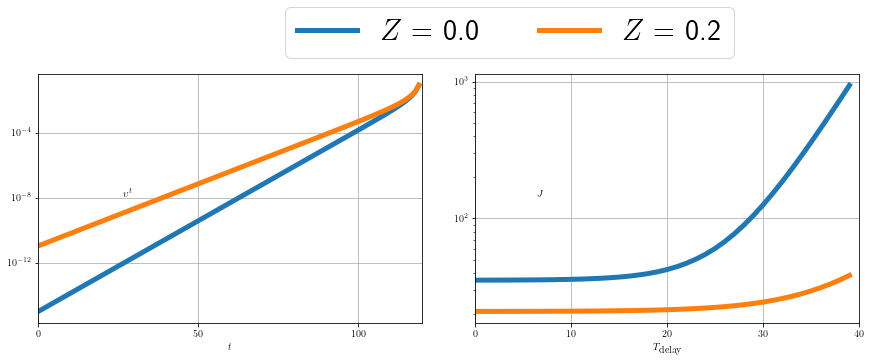

In [6]:
##### ##### Parameters ######################
#######################################
T = 120
U0 = 10 ** -4
αS = 0.08
αI = 0.5
γ = 1.0 / 13.0
# β = 0.3
# f0 = 2
Fmin = 0.6
ρ = 15 #0.001
Z = np.array([0, 0.1, 0.2])
Tdelay = np.linspace(0,50,51)
β0 = 0.9 # β * f0

#######################################
### Dynamics objects ##################
#######################################
υ = np.zeros((T, Z.shape[0]))
U = np.zeros((T, Tdelay.shape[0], Z.shape[0]))
F = np.zeros((T, Tdelay.shape[0], Z.shape[0])) 
J = np.zeros((T, Tdelay.shape[0], Z.shape[0])) 

fdynamics(υ, U, F, J, U0, γ, β0, Fmin, ρ, αS, αI, Z, Tdelay)
plot_fig12(T,40)

In [7]:
print('Condition for measures to help: ' + str((1 - γ) * β0 * 1))
print((1 - γ) ** -1 * (αI ** -1))

Condition for measures to help: 0.8307692307692308
2.1666666666666665


In [8]:
### Contact tracing functions 
def fbarαΙ(αS, αI, Z):
    return (1 - αI) * (1 - Z / (1 - αS))
    
def fA(A, Ftminus, Ft, γ, β0, αS, αI, Z):
    barγ = (1 - γ)
    aux = fbarαΙ(αS, αI, Z)
    A[0,0] = barγ * (β0 * Ft + aux) 
    A[0,1] = - (barγ ** 2) * aux * β0 * Ftminus
    A[1,0] = 1 - aux
    A[1,1] = barγ * aux * β0 * Ftminus
    
def fQ(calU, T, τ, t, γ, β0, Fmin, ρ, αS, αI, Z, zidx):
    ηmin = fη(γ, β0, Fmin, αS, αI, Z[zidx])
    ηmax = fη(γ, β0, 1, αS, αI, Z[zidx])
    #print("ηmin: " +str(ηmin))
    #print("ηmax: " +str(ηmax))
    a = 0.0
    for i in range(τ-1):
        a += ηmin ** i
    #print("a: " +str(a))
    b = 0.0 
    for i in range(T - t - τ):
        b += ηmax ** i
    b = (ηmin ** τ) * b
    #print("b: " +str(a))
    Q = τ * (1 - Fmin) +  ρ * calU[0, t, zidx] * (a + b)
    return Q

def f_if_zero_in_argmin_Q(calU, T, t, γ, β0, Fmin, ρ, αS, αI, Z, zidx):
    #print("1")
    if_tau_zero = True
    Q_zero = fQ(calU, T, 0, t, γ, β0, Fmin, ρ, αS, αI, Z, zidx)
    #print("2: " + str(Q_zero))
    for τ in range(1, T-t):
        #print("3a: " + str(τ))
        aux = fQ(calU, T, τ, t, γ, β0, Fmin, ρ, αS, αI, Z, zidx)
        #print("3b: " + str(aux))
        if Q_zero > aux:
            if_tau_zero = False
        if not if_tau_zero:
            break
    return if_tau_zero

In [9]:
##############################################
### Dynamics objects contact tracing #########
##############################################
calU = np.zeros((2, T, Z.shape[0]))
A = np.zeros((2,2))
Fc = np.zeros((T, Z.shape[0]))
Jc = np.zeros((Z.shape[0]))

Ftminus = 1
for zidx in range(Z.shape[0]):
    print("zidx: "+ str(zidx))
    calU[:,0,zidx] = [U0, 0]
    for t in range(0, T-1):
        Ft = Fmin
        if f_if_zero_in_argmin_Q(calU, T, t, γ, β0, Fmin, ρ, αS, αI, Z, zidx):
            Ft = 1
        ZZ = Z[zidx]
        fA(A, Ftminus, Ft, γ, β0, αS, αI, ZZ)
        calU[:,t+1,zidx] = np.matmul(A, calU[:,t,zidx])
        Fc[t, zidx] = Ft
        Ftminus = Ft
    Fc[T-1, zidx] = Fc[T-2, zidx]

for zidx in range(Z.shape[0]):
    for t in range(0, T-1):
        Jc[zidx] += (1 - Fc[t, zidx]) + ρ * calU[0,t,zidx] 
    Jc[zidx] += ρ * calU[0,T-1,zidx]

zidx: 0
zidx: 1
zidx: 2


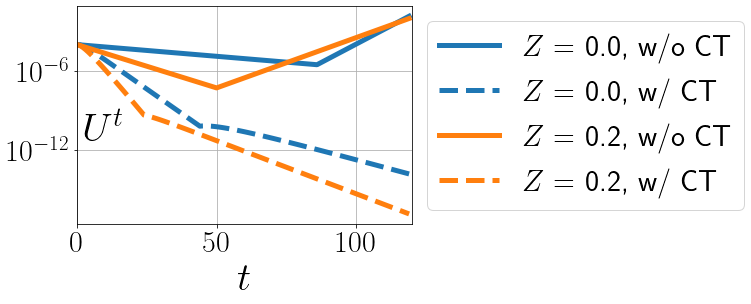

In [50]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def plot_fig3():
    plt.rcParams['text.usetex'] = True
    #plt.rcParams['font.family'] = 'text.usetex'
    
    fig, ax11 = plt.subplots(1, 1)    
    zidx = 0
    ax11.plot(U[:,0, zidx], label='$Z$ = ' + str(Z[zidx])+', w/o CT', linewidth=5, c =colors[0]) #
    ax11.plot(calU[0,:,zidx], label='$Z$ = ' + str(Z[zidx])+', w/ CT', linewidth=5, linestyle = 'dashed', c =colors[0]) #
    
    zidx = 2
    ax11.plot(U[:,0, zidx], label='$Z$ = ' + str(Z[zidx])+', w/o CT', linewidth=5, c =colors[1])
    ax11.plot(calU[0,:,zidx], label='$Z$ = ' + str(Z[zidx])+', w/ CT', linewidth=5, linestyle = 'dashed', c =colors[1])
        
    ax11.set_yscale("log")
    ax11.set_xlabel(r'$t$')
    ax11.set_ylabel(r'$U^t$', rotation=0, labelpad=-120)
    ax11.yaxis.set_label_coords(0.08,0.35)
    ax11.grid()
    ax11.set_xlim(0, T)
    ax11.legend(bbox_to_anchor=(1,1), loc="upper left")
    
#     legend_elements = [Line2D([0], [0], color='black', lw=3, label='No CT'),
#                        Line2D([0], [0], color='black', lw=3, label='With CT', linestyle = 'dotted')]
#     ax11.legend(handles=legend_elements)
    
    plt.rc('font', size = 30)
    plt.rc('axes', labelsize = 40)

    plt.savefig("fig3.pdf", transparent=True, bbox_inches='tight')
    plt.savefig("fig3.png", transparent=True, bbox_inches='tight')

plot_fig3()

In [11]:
zidx1 = 0 
zidx2 = 2 
print(" J at T                 & Z = "+ str(Z[zidx1]) + " & " +  str(Z[zidx2]))
print('Without contact tracing & ' + str(np.round(J[0, 0, zidx1],2)) +'  & ' + str(np.round(J[0, 0, zidx2],2)) +' \\' + '\\')
print('With contact tracing    & ' + str(np.round(Jc[zidx1],2)) +'  & ' + str(np.round(Jc[2],zidx2)) +' \\' + '\\')

 J at T                 & Z = 0.0 & 0.2
Without contact tracing & 35.37  & 20.9 \\
With contact tracing    & 17.61  & 9.61 \\


In [12]:
zidx1 = 0 
zidx2 = 2 
print("")
print(" U at T                 & Z = "+ str(Z[zidx1]) + " & " +  str(Z[zidx2]))
print('Without contact tracing & ' + str(np.round(U[T-1, 0, zidx1],10)) +'  & ' + str(np.round(U[T-1, 0, zidx2],10)) +' \\' + '\\')
print('With contact tracing    & ' + str(np.round(calU[0,T-1,zidx1],20)) +' & ' + str(np.round(calU[0,T-1,zidx2],20)) +' \\' + '\\')


 U at T                 & Z = 0.0 & 0.2
Without contact tracing & 0.0141384471  & 0.0095250047 \\
With contact tracing    & 1.556824e-14 & 1.446e-17 \\


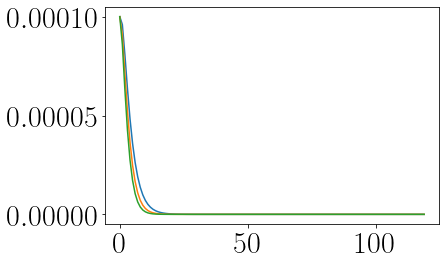

In [13]:
plt.plot(calU[0,:,:])